In [35]:
import pandas as pd
df=pd.read_csv('C:/Users/LENOVO/Desktop/oasis/L1_P1_retail_sales.csv')
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [21]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [22]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [23]:
df['Date'].min()

'2023-01-01'

In [24]:
df['Date'].max()

'2024-01-01'

# Cleaning the data

In [25]:
df['Date'] = pd.to_datetime(df['Date'])


In [26]:
# Descriptive Statistics
mean_sales = df['Total Amount'].mean()
median_sales = df['Total Amount'].median()
mode_sales = df['Total Amount'].mode()[0]
std_sales = df['Total Amount'].std()

print("Mean Sales:", mean_sales)
print("Median Sales:", median_sales)
print("Mode Sales:", mode_sales)
print("Standard Deviation of Sales:", std_sales)



Mean Sales: 456.0
Median Sales: 135.0
Mode Sales: 50
Standard Deviation of Sales: 559.997631555123


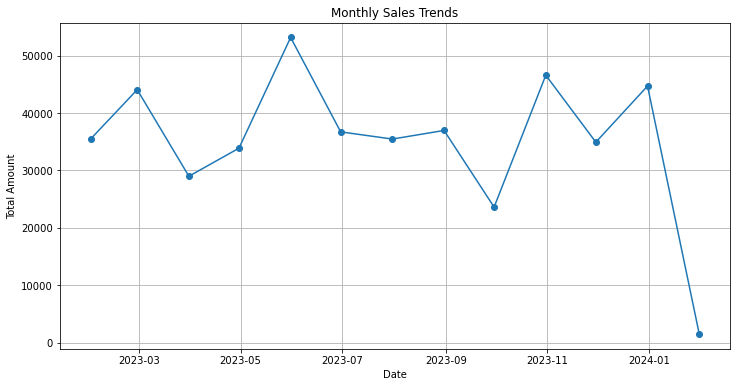

In [27]:
import matplotlib.pyplot as plt

# Time Series Analysis
df.set_index('Date', inplace=True)
monthly_sales = df.resample('M').sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Total Amount'], marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

The trend depicted in the line graph indicates a significant fluctuation in monthly sales over a period from March 2023 to January 2024.

In [28]:
# Customer and Product Analysis
customer_demographics = df.groupby('Gender').agg({'Customer ID': 'count', 'Age': 'mean'}).reset_index()
product_analysis = df.groupby('Product Category').agg({'Quantity': 'sum', 'Total Amount': 'sum'}).reset_index()

print("Customer Demographics:")
print(customer_demographics)
print("\nProduct Analysis:")
print(product_analysis)

Customer Demographics:
   Gender  Customer ID        Age
0  Female          510  41.356863
1    Male          490  41.428571

Product Analysis:
  Product Category  Quantity  Total Amount
0           Beauty       771        143515
1         Clothing       894        155580
2      Electronics       849        156905


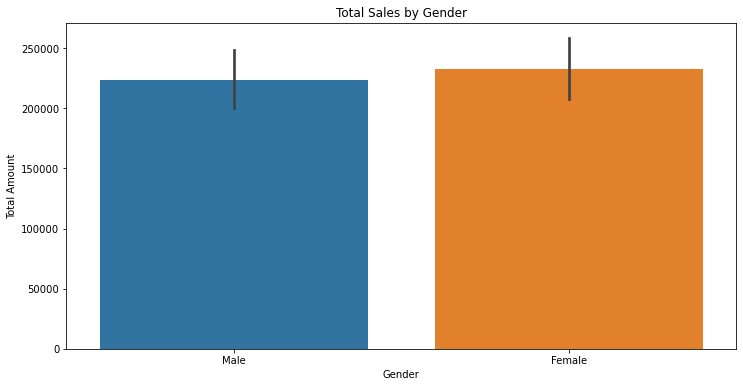

In [29]:
# Visualization
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Total Amount', data=df, estimator=sum)
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

Both genders show similar sales performance, with amounts just above 200,000.
Female customers have slightly higher sales than male customers.

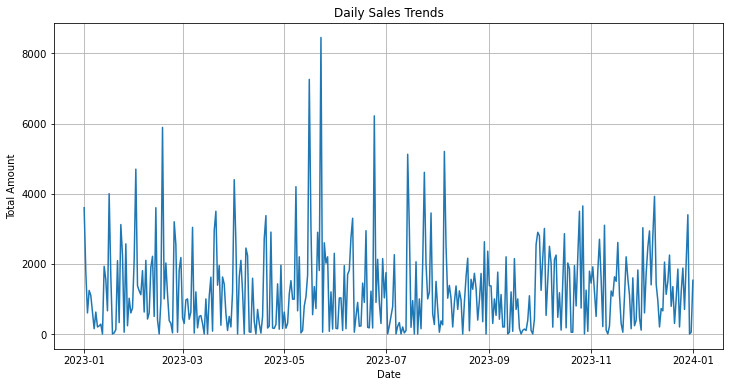

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total Amount', data=df.resample('D').sum())
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

The sales amounts vary significantly each day, with noticeable peaks and troughs. Certain days have particularly high sales, which could indicate special promotions or seasonal demand.

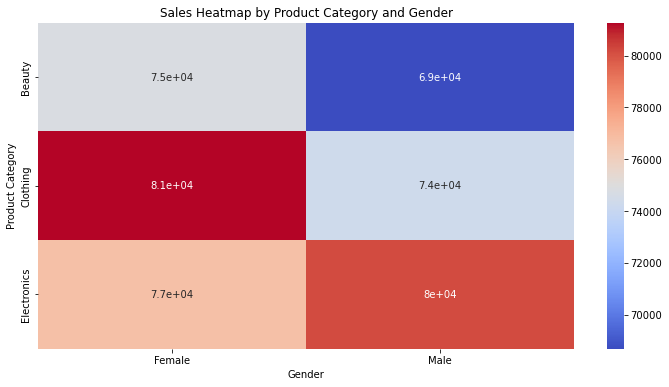

In [31]:
plt.figure(figsize=(12, 6))
heatmap_data = df.pivot_table(index='Product Category', columns='Gender', values='Total Amount', aggfunc='sum')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Sales Heatmap by Product Category and Gender')
plt.show()

Clothing for Females: The highest sales volume is in the clothing category for females, indicated by the darkest color intensity.
    
Electronics for Males: Electronics show the highest sales volume for males, also marked by the darkest color.
    
Color Scale: The color intensity correlates with sales volume, with darker colors representing higher sales.

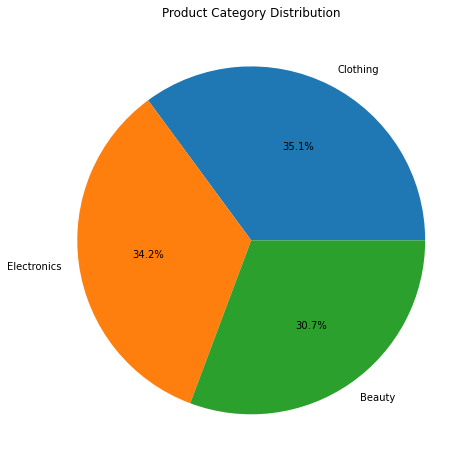

In [32]:
plt.figure(figsize=(8, 8))
df['Product Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Product Category Distribution')
plt.ylabel('')
plt.show()


Clothing Dominance: Clothing is the largest category, making up 35.1% of the distribution.
Electronics Close Second: Electronics follow closely at 34.2%.
Beauty Category: Beauty products account for 30.7% of the total.

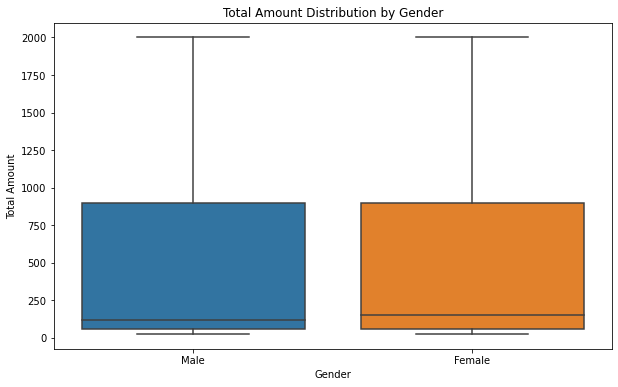

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Total Amount', data=df)
plt.title('Total Amount Distribution by Gender')
plt.show()


Female Lead: The total amount for females is significantly higher, extending beyond 1750 on the y-axis.
Male Comparison: The total amount for males reaches up to approximately 1250, which is lower than that for females.

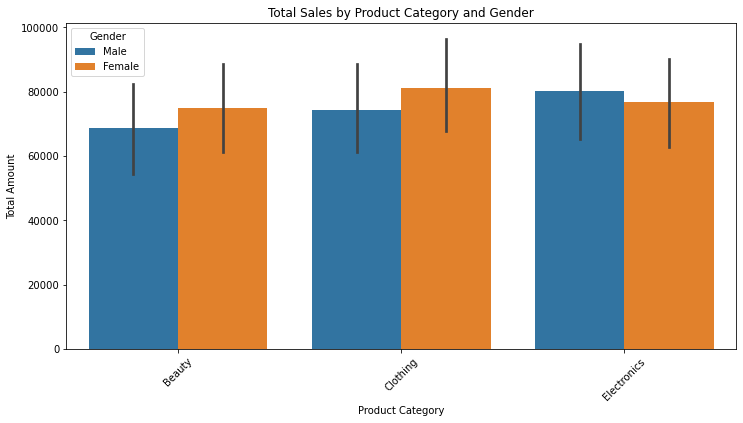

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Category', y='Total Amount', hue='Gender', data=df, estimator=sum)
plt.title('Total Sales by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


Beauty Category: Sales for females are slightly higher than males.
    
Clothing Category: Sales for males are slightly higher than females.
    
Electronics Category: Both genders have nearly identical sales figures.

# Conclusion

# Recommendations